In [1]:
# get rid of some chemprop warnings
# import warnings

# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
import pandas as pd

from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc

os.makedirs("/home/s2861704/ppk/test_kin/test_output/data", exist_ok=True)

df=pd.read_csv('/home/s2861704/ppk/test_kin/prep_storage/K200_EGFR_TEST.csv', sep=',')
display(df)
print(df['target_id'].unique())

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification
0,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL31;Sharma2016;Sharma2016,ChEMBL31.compound.33854;4277046;4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,17,18,2,34,33,14,35,32,13,38,...",P00533_WT,...,NaN,=,6.730; 6.726; 6.063,6.506,0.313000,0.222,3.0,6.726,0.004,Enzyme->Kinase->Protein Kinase->TK protein kin...
1,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4cn(C)nc4...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,NaN,=,7.276,7.276,0.000000,0.000,1.0,7.276,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
2,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(c1cccc(N)...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,NaN,=,6.321; 5.311; 4.952,5.528,0.580000,0.410,3.0,5.311,0.359,Enzyme->Kinase->Protein Kinase->TK protein kin...
3,AAGKMGNYUYCEPD_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.183555,CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl...,AAGKMGNYUYCEPD,AAGKMGNYUYCEPD-UHFFFAOYSA-N,InChI=1S/C23H19ClN6O2S/c1-14(31)25-8-10-30-9-7...,"""AuxInfo=1/1/N:1,22,21,23,30,29,9,5,8,6,15,26,...",P00533_WT,...,NaN,=,8.540,8.540,0.000000,0.000,1.0,8.540,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4,AAHKGRWRYBCWDL_on_P00533_WT,High,Sharma2016,4358384,CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC,AAHKGRWRYBCWDL,AAHKGRWRYBCWDL-UHFFFAOYSA-N,InChI=1S/C19H23N5O2/c1-3-26-14-9-8-12(10-15(14...,"""AuxInfo=1/1/N:1,7,2,15,16,14,17,25,26,8,23,9,...",P00533_WT,...,NaN,=,5.854,5.854,0.000000,0.000,1.0,5.854,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,ZZKJYWJMKZJTKA_on_P04626_WT,High,ChEMBL31,ChEMBL31.compound.221773,NS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,ZZKJYWJMKZJTKA,ZZKJYWJMKZJTKA-UHFFFAOYSA-N,InChI=1S/C28H25ClFN5O4S/c29-24-14-21(5-8-27(24...,"""AuxInfo=1/1/N:31,30,32,14,37,10,15,36,11,6,5,...",P04626_WT,...,NaN,=,8.41,8.410,0.000000,0.000,1.0,8.410,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
15999,ZZRGSHVUZJRFKX_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.85261;4348271,NC1CCN(Cc2ccn3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c...,ZZRGSHVUZJRFKX,ZZRGSHVUZJRFKX-UHFFFAOYSA-N,InChI=1S/C25H26ClFN6O/c26-22-13-21(4-5-23(22)3...,"""AuxInfo=1/1/N:20,19,21,26,25,32,3,34,4,33,31,...",P00533_WT,...,NaN,=,7.42;7.42,7.420,0.000000,0.000,2.0,7.420,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
16000,ZZRGSHVUZJRFKX_on_P04626_WT,High,ChEMBL31,ChEMBL31.compound.85261,NC1CCN(Cc2ccn3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c...,ZZRGSHVUZJRFKX,ZZRGSHVUZJRFKX-UHFFFAOYSA-N,InChI=1S/C25H26ClFN6O/c26-22-13-21(4-5-23(22)3...,"""AuxInfo=1/1/N:20,19,21,26,25,32,3,34,4,33,31,...",P04626_WT,...,NaN,=,7.5,7.500,0.000000,0.000,1.0,7.500,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
16001,ZZYCYTFKFSOZMZ_on_P17948_WT,High,ChEMBL31,ChEMBL31.compound.56356,COc1ccc(Nc2nnc(-c3cccnc3CCc3ccncc3)o2)cc1OC,ZZYCYTFKFSOZMZ,ZZYCYTFKFSOZMZ-UHFFFAOYSA-N,InChI=1S/C22H21N5O3/c1-28-19-8-6-16(14-20(19)2...,"""AuxInfo=1/1/N:1,30,14,13,19,5,18,4,21,25,15,2...",P17948_WT,...,NaN,=,6.75,6.750,0.000000,0.000,1.0,6.750,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...


['P00533_WT' 'P04626_WT' 'P35968_WT' 'P17948_WT' 'P35916_WT' 'Q15303_WT']


In [3]:
df=df[df['target_id']== 'Q15303_WT']
display(df)

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification
4459,ACNYXAIBELJFSP_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305338,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,ACNYXAIBELJFSP,ACNYXAIBELJFSP-UHFFFAOYSA-N,InChI=1S/C34H39N7O2/c1-6-43-32-19-29-28(18-30(...,"""AuxInfo=1/1/N:1,14,15,17,18,2,34,33,35,10,32,...",Q15303_WT,...,NaN,=,8.220,8.220000,0.000000,0.000000,1.0,8.220,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4460,AEBKFOMFJMJUFH_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305341,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,AEBKFOMFJMJUFH,AEBKFOMFJMJUFH-UHFFFAOYSA-N,InChI=1S/C35H39N7O2/c1-4-44-33-20-30-29(19-31(...,"""AuxInfo=1/1/N:1,14,19,2,35,34,36,16,10,15,17,...",Q15303_WT,...,NaN,=,8.300,8.300000,0.000000,0.000000,1.0,8.300,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4461,AECDBHGVIIRMOI_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.297362,Nc1ncnc2c1c(-c1cccc(OCc3ccccc3)c1)cn2C1CC(CN2C...,AECDBHGVIIRMOI,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,"""AuxInfo=1/1/N:15,14,16,7,27,13,17,6,8,26,28,2...",Q15303_WT,...,NaN,=,5.770,5.770000,0.000000,0.000000,1.0,5.770,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4462,AHBFBRPGNOVEBK_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.373541,CC1(C(=O)N2CCCC(c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)...,AHBFBRPGNOVEBK,AHBFBRPGNOVEBK-UHFFFAOYSA-N,InChI=1S/C29H28F3N7O3/c1-28(15-42-16-28)27(41)...,"""AuxInfo=1/1/N:1,7,8,14,31,15,30,23,22,36,6,37...",Q15303_WT,...,NaN,=,6.930,6.930000,0.000000,0.000000,1.0,6.930,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4463,AHONPWLSTJWLMC_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305331,CCC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)cc3)ncnc2cc1OC,AHONPWLSTJWLMC,AHONPWLSTJWLMC-UHFFFAOYSA-N,InChI=1S/C24H23N5O3/c1-3-23(30)29-21-12-19-20(...,"""AuxInfo=1/1/N:1,9,2,27,26,28,18,30,19,29,25,3...",Q15303_WT,...,NaN,=,6.970,6.970000,0.000000,0.000000,1.0,6.970,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15587,WDENQIQQYWYTPO_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.363889,CC#CC(=O)N1CCCC1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2...,WDENQIQQYWYTPO,WDENQIQQYWYTPO-UHFFFAOYSA-N,InChI=1S/C26H23N7O2/c1-2-6-21(34)32-15-5-7-19(...,"""AuxInfo=1/1/N:1,2,25,24,8,3,9,26,15,28,16,27,...",Q15303_WT,...,NaN,=,6.85;7.8,7.325000,0.671751,0.475000,2.0,7.325,0.4750,Enzyme->Kinase->Protein Kinase->TK protein kin...
15593,WDQXCAKHPJSZET_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.236229,O=C(C=CCN1CC2CCC1C(=O)C2)Nc1cc2c(Nc3ccc(F)c(Cl...,WDQXCAKHPJSZET,WDQXCAKHPJSZET-UHFFFAOYSA-N,InChI=1S/C23H21ClFN5O2S/c24-16-9-14(4-5-17(16)...,"""AuxInfo=1/1/N:4,3,9,32,31,10,5,14,26,17,7,21,...",Q15303_WT,...,NaN,=,7.43,7.430000,0.000000,0.000000,1.0,7.430,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...
15684,XGALLCVXEZPNRQ_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.2213;Christmann2016.compound...,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,XGALLCVXEZPNRQ,XGALLCVXEZPNRQ-UHFFFAOYSA-N,InChI=1S/C22H24ClFN4O3/c1-29-20-13-19-16(12-21...,"""AuxInfo=1/1/N:1,11,22,23,12,14,18,10,15,17,28...",Q15303_WT,...,NaN,=,6.32;6.8;6.387;6.387,6.473500,0.219946,0.109973,4.0,6.387,0.0335,Enzyme->Kinase->Protein Kinase->TK protein kin...
15750,XYFPWWZEPKGCCK_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.302115,C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N...,XYFPWWZEPKGCCK,XYFPWWZEPKGCCK-UHFFFAOYSA-N,InChI=1S/C25H24N6O2/c1-2-21(32)30-14-6-7-18(15...,"""AuxInfo=1/1/N:1,2,21,20,22,7,8,19,23,14,25,15...",Q15303_WT,...,NaN,=,7.52;8.74;9.22;8.62;9.6;8.47;8.15,8.617143,0.681682,0.257652,7.0,8.620,0.4700,Enzyme->Kinase->Protein Kinase->TK protein kin...


In [4]:

# Create dataset
dataset = QSPRDataset(
    df=df,
    store_dir="/home/s2861704/ppk/test_kin/test_output/data",
    name="ChempropSTTestDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    random_state=42
)

# calculate compound features and split dataset into train and test
feature_calculators = [SmilesDesc(), MorganFP(radius=3, nBits=2048)]
dataset.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset),
    feature_calculators=feature_calculators,
    recalculate_features=True,
)

dataset.getDF().head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
ChempropSTTestDataset_000,ACNYXAIBELJFSP_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305338,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,ACNYXAIBELJFSP,ACNYXAIBELJFSP-UHFFFAOYSA-N,InChI=1S/C34H39N7O2/c1-6-43-32-19-29-28(18-30(...,"""AuxInfo=1/1/N:1,14,15,17,18,2,34,33,35,10,32,...",Q15303_WT,...,8.220,8.22,0.0,0.0,1.0,8.22,0.0,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_000,8.22
ChempropSTTestDataset_001,AEBKFOMFJMJUFH_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305341,CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC...,AEBKFOMFJMJUFH,AEBKFOMFJMJUFH-UHFFFAOYSA-N,InChI=1S/C35H39N7O2/c1-4-44-33-20-30-29(19-31(...,"""AuxInfo=1/1/N:1,14,19,2,35,34,36,16,10,15,17,...",Q15303_WT,...,8.300,8.30,0.0,0.0,1.0,8.30,0.0,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_001,8.30
ChempropSTTestDataset_002,AECDBHGVIIRMOI_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.297362,Nc1ncnc2c1c(-c1cccc(OCc3ccccc3)c1)cn2C1CC(CN2C...,AECDBHGVIIRMOI,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,"""AuxInfo=1/1/N:15,14,16,7,27,13,17,6,8,26,28,2...",Q15303_WT,...,5.770,5.77,0.0,0.0,1.0,5.77,0.0,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_002,5.77
ChempropSTTestDataset_003,AHBFBRPGNOVEBK_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.373541,CC1(C(=O)N2CCCC(c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)...,AHBFBRPGNOVEBK,AHBFBRPGNOVEBK-UHFFFAOYSA-N,InChI=1S/C29H28F3N7O3/c1-28(15-42-16-28)27(41)...,"""AuxInfo=1/1/N:1,7,8,14,31,15,30,23,22,36,6,37...",Q15303_WT,...,6.930,6.93,0.0,0.0,1.0,6.93,0.0,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_003,6.93
ChempropSTTestDataset_004,AHONPWLSTJWLMC_on_Q15303_WT,High,ChEMBL31,ChEMBL31.compound.305331,CCC(=O)Nc1cc2c(Nc3ccc(OCc4ccccn4)cc3)ncnc2cc1OC,AHONPWLSTJWLMC,AHONPWLSTJWLMC-UHFFFAOYSA-N,InChI=1S/C24H23N5O3/c1-3-23(30)29-21-12-19-20(...,"""AuxInfo=1/1/N:1,9,2,27,26,28,18,30,19,29,25,3...",Q15303_WT,...,6.970,6.97,0.0,0.0,1.0,6.97,0.0,Enzyme->Kinase->Protein Kinase->TK protein kin...,ChempropSTTestDataset_004,6.97


In [5]:
from qsprpred.extra.gpu.models.chemprop import ChempropModel

ChempropModel.getAvailableParameters()

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


{'no_cuda': 'Turn off cuda (i.e., use CPU instead of GPU).',
 'gpu': 'Which GPU to use.',
 'num_workers': 'Number of workers for the parallel data loading (0 means sequential).',
 'batch_size': 'Batch size.',
 'no_cache_mol': 'Whether to not cache the RDKit molecule for each SMILES string to reduce memory usage (cached by default).',
 'empty_cache': 'Whether to empty all caches before training or predicting. This is necessary if multiple jobs are run within a single script and the atom or bond features change.',
 'loss_function': 'Choice of loss function. Loss functions are limited to compatible dataset types.',
 'metric': "Metric to use with the validation set for early stopping. Defaults to 'auc' for classification, 'rmse' for regression. Note. In Chemprop this metric is also used for test-set evaluation, but in QSPRpred this is determined by the scoring parameter in assessment.",
 'bias': 'Whether to add bias to linear layers.',
 'hidden_size': 'Dimensionality of hidden layers in MP

In [6]:
# Create model
os.makedirs("/home/s2861704/ppk/test_kin/test_output/models", exist_ok=True)
model = ChempropModel(
    base_dir='/home/s2861704/ppk/test_kin/test_output/models',
    name='ChempropSTTestModel',
    parameters={"epochs": 5},
    quiet_logger=False
)

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/chemprop/utils.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location

In [ ]:
from qsprpred.models import CrossValAssessor, TestSetAssessor
from qsprpred.models.early_stopping import EarlyStoppingMode

# We can now assess the model performance on the training set using cross validation
CrossValAssessor('r2')(model, dataset)

# and on the test set
TestSetAssessor('r2')(model, dataset)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
model.earlyStopping.numEpochs = 5
model.fitDataset(dataset, mode=EarlyStoppingMode.FIXED)

# We can optionally save the model and metadata to disk explicitly as well
_ = model.save()

Total size = 112
Fitting scaler
Number of parameters = 355,201
Moving trained model to cuda
 80%|████████  | 4/5 [00:01<00:00,  2.82it/s]Epoch 4
Loss = 1.0860e+00, PNorm = 33.9669, GNorm = 5.9479, lr_0 = 1.0000e-04
100%|██████████| 5/5 [00:01<00:00,  2.56it/s]
qsprpred - WARNING - Early stopping did not yield a best model, using last model instead.
Total size = 112
Fitting scaler
Number of parameters = 355,201
Moving trained model to cuda
 80%|████████  | 4/5 [00:00<00:00,  4.87it/s]Epoch 4
Loss = 9.3461e-01, PNorm = 33.9696, GNorm = 1.3351, lr_0 = 1.0000e-04
100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
qsprpred - WARNING - Early stopping did not yield a best model, using last model instead.
Total size = 112
Fitting scaler
Number of parameters = 355,201
Moving trained model to cuda
 80%|████████  | 4/5 [00:00<00:00,  4.95it/s]Epoch 4
Loss = 9.2495e-01, PNorm = 33.9690, GNorm = 1.8165, lr_0 = 1.0000e-04
100%|██████████| 5/5 [00:01<00:00,  4.92it/s]
qsprpred - WARNING - Early stopping d

ChempropSTTestModel


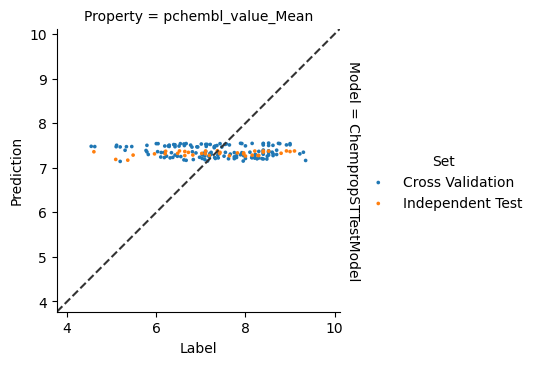

<Figure size 640x480 with 0 Axes>

In [8]:
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([model])
axes, summary = plot.make(save=True, show=True, out_path='/home/s2861704/ppk/test_kin/test_output/ChempropST6.png')

In [9]:
summary

,Model,Fold,Property,R2,RMSE,Set
0,ChempropSTTestModel,0.0,pchembl_value_Mean,-0.043801,1.104124,Cross Validation
1,ChempropSTTestModel,1.0,pchembl_value_Mean,-0.116237,0.829389,Cross Validation
2,ChempropSTTestModel,2.0,pchembl_value_Mean,-0.041002,1.085247,Cross Validation
3,ChempropSTTestModel,3.0,pchembl_value_Mean,-0.340407,1.362010,Cross Validation
4,ChempropSTTestModel,4.0,pchembl_value_Mean,-0.080188,0.939503,Cross Validation
5,ChempropSTTestModel,Independent Test,pchembl_value_Mean,0.031318,1.119037,Independent Test
